# Investigations of the lithosphere

**Goal:** Bring together all that we've learned so far to investigate the state of the lithosphere is different parts of the world.

So far we've learned how to:

1. Assess the overall state of isostatic equilibrium of the lithosphere using topography/bathymetry and gravity data
1. Model the thermal evolution of the oceanic lithosphere and compare model predictions against heat flow and bathymetry data
1. Model the bending of the lithosphere at subduction zones and make predictions of bathymetry and gravity disturbances along profiles
1. Model the intra-plate bending of the lithosphere under the weight of oceanic islands and seamounts and compare model predictions against observed gravity disturbances

In this practical, you will:

1. Investigate a particular region of the Earth using global topography/bathymetry, age, heat flow, and gravity data
1. Use all of the tools available to you to describe the overall state of the lithosphere (isostic equilibrium, flexure, thickness, age, fit to models, etc)
1. Work in groups to come up with a summary of your understanding of the lithosphere in that particular region

## The data

**Download** (if you haven't already): [global-geophysical-data.nc](https://github.com/leouieda/lithosphere/raw/main/data/global-geophysical-data.nc) (place it in the **same folder** as this notebook)

The data grids are stored in a [netCDF](https://en.wikipedia.org/wiki/NetCDF) file, which is a very common standard for storing and distributing gridded data. It's used throughout the Earth, ocean, and climate sciences and can be read an manipulated with most software platforms. It contains global grids of gravity, topography, and heat flow. All grids were interpolated onto the same resolution of 0.2 degrees (a compromise between resolution and size of the file) so that we can easily compare and use all of the data together.

* **Gravity**: generated from the [EIGEN-6C4 spherical harmonic model](https://doi.org/10.5880/icgem.2015.1) through the [ICGEM webservice](http://icgem.gfz-potsdam.de/home). It includes two grids: the gravity disturbance calculated with the WGS84 ellipsoid and the Bouguer gravity disturbance calculated using a topography density of 2670 kg/m³. The data for both grids was generated on top of the Earth's surface (the water surface in the oceans and topography on land).
* **Topography and bathymetry**: a downsampled version of [ETOPO1](https://doi.org/10.7289/V5C8276M) and includes a version smoothed using a Gaussian filter with 1 degree width (~100 km).
* **Heat flow**: an upsampled version of the compilation by [Lucazeau (2019)](https://doi.org/10.1029/2019GC008389) (originally 0.5 degree resolution).
* **Lithosphere age (oceanic)**: a downsampled version of the grid by [Müller et al. (2008)](https://doi.org/10.1029/2007GC001743) (originally 6 arc-minutes).

## Import the required libraries

Load the required software to load the data, make maps, and perform calculations.

Since we are reusing code and models from previous lessons, you may want to **add them to the `lithosphere.py` module** so that you can easily access your functions in this notebook.

In [1]:
# For arrays and linear algebra
import numpy as np
# To make figures and maps
import matplotlib.pyplot as plt
# To load and manipulate grids
import xarray as xr
# To insert a Google Map on the notebook
from IPython.display import IFrame
# Import our own module (lithosphere.py)
import lithosphere

## Load the data grids

Once again, we'll use xarray to load the data from the netCDF file.

In [2]:
data = xr.load_dataset("global-geophysical-data.nc")
data

<xarray.Dataset>
Dimensions:              (latitude: 901, longitude: 1800)
Coordinates:
  * latitude             (latitude) float32 -90.0 -89.8 -89.6 ... 89.6 89.8 90.0
  * longitude            (longitude) float32 -180.0 -179.8 ... 179.6 179.8
    height               (latitude, longitude) float32 2.716e+03 ... 15.47
Data variables:
    gravity_disturbance  (latitude, longitude) float32 -27.21 -27.21 ... 24.71
    gravity_bouguer      (latitude, longitude) float32 -331.2 -331.2 ... 312.6
    topography_smoothed  (latitude, longitude) float32 2.796e+03 ... -3.56e+03
    topography           (latitude, longitude) float32 2.716e+03 ... -4.213e+03
    heat_flow            (latitude, longitude) float32 75.2 75.2 ... 84.7 84.7
    lithosphere_age      (latitude, longitude) float32 nan nan ... 55.46 55.46

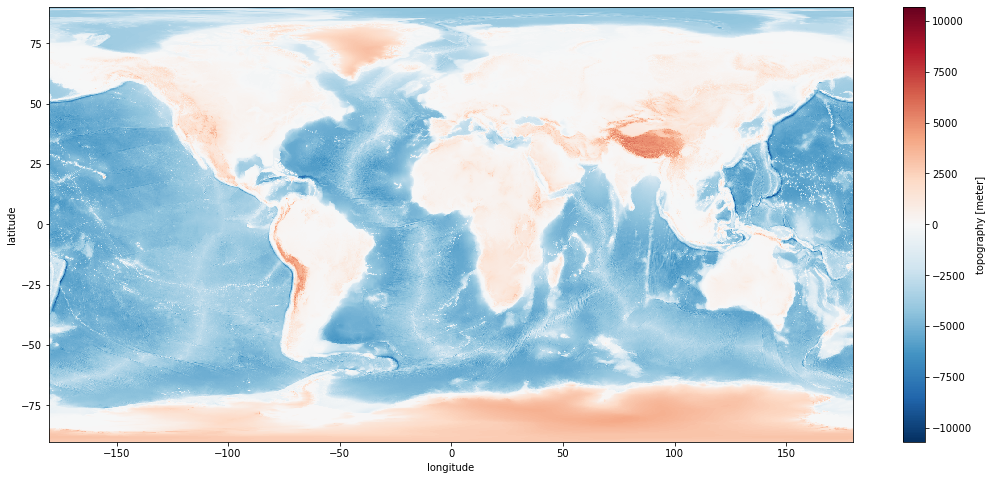

In [3]:
data.topography.plot(figsize=(18, 8))

And let's also insert a Google Map so that we can easily look up the names of places and locate our study areas.

In [4]:
IFrame("https://www.google.com/maps/embed?pb=!1m14!1m12!1m3!1d68542618.09920536!2d1.6072808059942376!3d-3.737561027842355!2m3!1f0!2f0!3f0!3m2!1i1024!2i768!4f13.1!5e1!3m2!1sen!2suk!4v1621589542222!5m2!1sen!2suk", width=1000, height=600)

---

## **Your turn!**

Each group will be assigned one of three study areas:

1. Hawaiian Islands: `longitude=slice(-170, -145), latitude=slice(13, 30)`
1. Mariana trench and the Philippine Sea: `longitude=slice(135, 163), latitude=slice(11, 25)`
1. Southern Ocean near the Scotia and Sandwich Plate and the Bouvet triple junction: `longitude=slice(-50, 15), latitude=slice(-65, -50)`

Your task is to:

* Gather the available data for your area
* Make plots, maps, and profiles as you see fit
* Think about what the data can tell you about the lithosphere and tectonics of the area
* Supplement the data investigation with some Google searches
* Use 1 or more of the models we've seen to try to explain the observed data
* Discuss your findings as a group: relate the data, model fit (or lack thereof), and background information

You will deliver back to the whole class:

* A bullet point summary of your findings
* Selected figures that support your ideas

Some tips:

* Start off by plotting the maps of all available data
* Divide the work between group members or pairs
* Take notes as you work instead of waiting until the end